# Regresión lineal.

## Introducción

El concepto de regresión está relacionado con **intentar realizar predicciones acerca de cantidades del mundo real**. Por ejemplo, tratar de responder las siguientes preguntas:

* ¿Si cambio el precio de un producto, cómo cambiará el volumen de las ventas?
* ¿Cómo es que estas ventas pueden verse afectadas por el cambio en el clima?
* ¿A qué hora debo viajar para evitar carga en el tránsito vehicular? ¿y si llueve, cómo cambia el tránsito?
* ¿Cuál es la probabilidad de que llueva en ciertos días de un cierto mes del año?

La(s) respuesta(s) a estas preguntas se pueden construir como una combinanción de una o más variables (independientes). El papel de la regresión es **construir un modelo que pueda predecir la respuesta con base en esas variables**. Este proceso involucra la transición de los datos hacia un modelo de predicción.

El modelo de predicción puede ser útil para diferentes tareas, tales como:

1. Analizar el comportamiento de los datos (la relación entre la respuesta y las variables).
2. Predecir valores en los datos (ya sea continuos o discretos).
3. Encontrar variables importantes en el modelo (cuáles de ellas tienen más impacto).

Existen varios tipos de regresión conocidos como regresión lineal simple, lineal múltiple o logística. 

En esta notebook veremos ejemplos de regresión lineal simple.


<div class="alert alert-info">

## Definición de datos.

Considera los siguientes cuatro conjuntos de datos.

|`   ` Dataset 1||`   ` Dataset 2||`   ` Dataset 3||`   ` Dataset 4||
|:---:|:-----:|:----:|:----:|:----:|:-----:|:----:|:-----:|
| $x$ |  $y$  | $x$  | $y$  |  $x$ |  $y$  | $x$  |  $y$  |
|10.0 | 8.04  | 10.0 | 9.14 | 10.0 | 7.46  | 8.0  | 6.58  |
|8.0  | 6.95  | 8.0  | 8.14 | 8.0  | 6.77  | 8.0  | 5.76  |
|13.0 | 7.58  | 13.0 | 8.74 | 13.0 | 12.74 | 8.0  | 7.71  |
|9.0  | 8.81  | 9.0  | 8.77 | 9.0  | 7.11  | 8.0  | 8.84  |
|11.0 | 8.33  | 11.0 | 9.26 | 11.0 | 7.81  | 8.0  | 8.47  |
|14.0 | 9.96  | 14.0 | 8.10 | 14.0 | 8.84  | 8.0  | 7.04  |
|6.0  | 7.24  | 6.0  | 6.13 | 6.0  | 6.08  | 8.0  | 5.25  |
|4.0  | 4.26  | 4.0  | 3.10 | 4.0  | 5.39  | 19.0 | 12.50 |
|12.0 | 10.84 | 12.0 | 9.13 | 12.0 | 8.15  | 8.0  | 5.56  |
|7.0  | 4.82  | 7.0  | 7.26 | 7.0  | 6.42  | 8.0  | 7.91  |
|5.0  | 5.68  | 5.0  | 4.74 | 5.0  | 5.73  | 8.0  | 6.89  |

donde $x$ es la variable independiente y $y$ es la respuesta (variable dependiente).

Estos cuatro conjuntos de datos se conocen cómo  [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).
Los cuatro conjuntos tienen las mismas propiedades estadísticas:

| Propiedad | Valor   |
|---:|---|
| Media $\bar{x}$ | 9     |
| Media $\bar{y}$ | 7.50  |
| Varianza muestral $s_x^2$   | 11    |
| Varianza muestral $s_y^2$   | 4.125 |
| Correlación entre $x$ y $y$ | 0.816 |
| Regresión lineal | $y$ = 3.00 + 0.500$x$ |
| Coef. de determinación $R^{2}$ | 0.67 |

Referencia: Anscombe, F. J. (1973). "Graphs in Statistical Analysis". The American Statistician. 27 (1): 17–21. doi:10.2307/2682899. JSTOR 2682899. 
</div>

<div class="alert alert-success">

### Ejercicio 1.

Leer el archivo `AnscombeQuartet.csv` e imprimir el conjunto de datos usando el siguiente código:

```python
datos = pd.read_csv("AnscombeQuartet.csv")
datos
```
</div>

In [1]:
# Ejecuta esta celda para importar las bibliotecas que usaremos en este ejemplo.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from macti.eval import Quiz 
quiz = Quiz("reg_lin_1", "PAPIME2025", "local")

In [2]:
# Copia aquí el código para la lectura de los datos.
### BEGIN SOLUTION
from macti.eval import FileAnswer 
file_answer = FileAnswer()
file_answer.verb = 1

datos = pd.read_csv("AnscombeQuartet.csv")
datos
### END SOLUTION

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


## Media y varianza

Dados los $n$ números $\{x_{1},x_{2},\ldots ,x_{n}\}$, la media se define como:

$$
\bar{x}={\frac{1}{n}}\sum_{i=1}^{n}x_{i}
$$


y la varianza muestral se define como:

$$
s_x^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

Ejecuta la siguiente celda para definir las funciones `media(X)` y `varianza(X)` que implementan las dos fórmulas anteriores.

In [3]:
def media(X):
    suma = 0
    for xi in X:
        suma += xi
    
    return suma / len(X)

def varianza(X):
    𝑥𝑚 = media(X)
    suma = 0
    for xi in X:
        suma += (xi - 𝑥𝑚)**2
    
    return suma / (len(X)-1)

<div class="alert alert-success">

### Ejercicio 2.
Usando la funciones `media(X)` y `varianza(Y)`, calcula la media y la varianza de $x$ y $y$ para cada uno de los conjuntos de datos (*Datasets*).

Por ejemplo:

```python
# Dataset 1
𝑥𝑚_1 = media(datos.x1)
𝑦𝑚_1 = media(datos.y1)
𝑠𝟸𝑥_1 = varianza(datos.x1)
𝑠𝟸𝑦_1 = varianza(datos.y1)

print(f" 𝑥𝑚_1 = {𝑥𝑚_1:>5.2f}")
print(f" 𝑦𝑚_1 = {𝑦𝑚_1:>5.2f}")
print(f" 𝑠𝑥_1 = {𝑠𝟸𝑥_1:>6.3f}")
print(f" 𝑠𝑦_1 = {𝑠𝟸𝑦_1:>6.3f}\n")

# Dataset 2
...
```

<br>

Completa el código para todos los *Datasets* y comprueba que la media y la varianza tienen los valores mencionados por Anscombe.

</div>

In [4]:
# Calcula e imprime la media y la varianza.
# Dataset 1
### BEGIN SOLUTION
𝑥𝑚_1 = media(datos.x1)
𝑦𝑚_1 = media(datos.y1)
𝑠𝟸𝑥_1 = varianza(datos.x1)
𝑠𝟸𝑦_1 = varianza(datos.y1)

print(f" 𝑥𝑚_1 = {𝑥𝑚_1:>5.2f}")
print(f" 𝑦𝑚_1 = {𝑦𝑚_1:>5.2f}")
print(f" 𝑠𝟸𝑥_1 = {𝑠𝟸𝑥_1:>6.3f}")
print(f" 𝑠𝟸𝑦_1 = {𝑠𝟸𝑦_1:>6.3f}\n")

def msg_1(s_v, s_n, f):
    msg = f"""
    * Asegurate de haber ejecutado la celda donde se 
    definen las funciones 'media(X)' y 'varianza(Y)'.
    * Revisa que hayas pasado 'datos.{s_v}{s_n}' a la función '{f}'.
    """
    return msg
    
file_answer.write('1', 𝑥𝑚_1, msg_1("x","1","media(X)"))
file_answer.write('2', 𝑦𝑚_1, msg_1("y","1","media(X)"))
file_answer.write('3', 𝑠𝟸𝑥_1, msg_1("x","1","varianza(X,Y)"))
file_answer.write('4', 𝑠𝟸𝑦_1, msg_1("y","1","varianza(X,Y)"))
file_answer.to_file("reg_lin_1")
### END SOLUTION

 𝑥𝑚_1 =  9.00
 𝑦𝑚_1 =  7.50
 𝑠𝟸𝑥_1 = 11.000
 𝑠𝟸𝑦_1 =  4.127

El directorio :/home/jovyan/PAPIME2025/.ans/linear-regression/ ya existe
Respuestas y retroalimentación almacenadas.


In [5]:
# Evaluación de los resultados para el Dataset 1
quiz.eval_numeric('1', 𝑥𝑚_1)
quiz.eval_numeric('2', 𝑦𝑚_1)
quiz.eval_numeric('3', 𝑠𝟸𝑥_1)
quiz.eval_numeric('4', 𝑠𝟸𝑦_1)

――――――――――――――――――――――――――――――――――――――――
1 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
2 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
3 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
4 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


In [6]:
# Dataset 2
### BEGIN SOLUTION
𝑥𝑚_2 = media(datos.x2)
𝑦𝑚_2 = media(datos.y2)
𝑠𝟸𝑥_2 = varianza(datos.x2)
𝑠𝟸𝑦_2 = varianza(datos.y2)

print(f" 𝑥𝑚_2 = {𝑥𝑚_2:>5.2f}")
print(f" 𝑦𝑚_2 = {𝑦𝑚_2:>5.2f}")
print(f" 𝑠𝟸𝑥_2 = {𝑠𝟸𝑥_2:>6.3f}")
print(f" 𝑠𝟸𝑦_2 = {𝑠𝟸𝑦_2:>6.3f}\n")

file_answer.write('5', 𝑥𝑚_2, msg_1("x","2","media(X)"))
file_answer.write('6', 𝑦𝑚_2, msg_1("y","2","media(X)"))
file_answer.write('7', 𝑠𝟸𝑥_2, msg_1("x","2","varianza(X,Y)"))
file_answer.write('8', 𝑠𝟸𝑦_2, msg_1("y","2","varianza(X,Y)"))
file_answer.to_file("reg_lin_1")
### END SOLUTION

 𝑥𝑚_2 =  9.00
 𝑦𝑚_2 =  7.50
 𝑠𝟸𝑥_2 = 11.000
 𝑠𝟸𝑦_2 =  4.128

El directorio :/home/jovyan/PAPIME2025/.ans/linear-regression/ ya existe
Respuestas y retroalimentación almacenadas.


In [7]:
# Evaluación de los resultados para el Dataset 2
quiz.eval_numeric('5', 𝑥𝑚_2)
quiz.eval_numeric('6', 𝑦𝑚_2)
quiz.eval_numeric('7', 𝑠𝟸𝑥_2)
quiz.eval_numeric('8', 𝑠𝟸𝑦_2)

――――――――――――――――――――――――――――――――――――――――
5 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
6 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
7 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
8 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


In [8]:
# Dataset 3
### BEGIN SOLUTION
𝑥𝑚_3 = media(datos.x3)
𝑦𝑚_3 = media(datos.y3)
𝑠𝟸𝑥_3 = varianza(datos.x3)
𝑠𝟸𝑦_3 = varianza(datos.y3)

print(f" 𝑥𝑚_3 = {𝑥𝑚_3:>5.2f}")
print(f" 𝑦𝑚_3 = {𝑦𝑚_3:>5.2f}")
print(f" 𝑠𝟸𝑥_3 = {𝑠𝟸𝑥_3:>6.3f}")
print(f" 𝑠𝟸𝑦_3 = {𝑠𝟸𝑦_3:>6.3f}\n")

file_answer.write('9', 𝑥𝑚_3, msg_1("x","3","media(X)"))
file_answer.write('10', 𝑦𝑚_3, msg_1("y","3","media(X)"))
file_answer.write('11', 𝑠𝟸𝑥_3, msg_1("x","3","varianza(X,Y)"))
file_answer.write('12', 𝑠𝟸𝑦_3, msg_1("y","3","media(X)"))
file_answer.to_file("reg_lin_1")
### END SOLUTION

 𝑥𝑚_3 =  9.00
 𝑦𝑚_3 =  7.50
 𝑠𝟸𝑥_3 = 11.000
 𝑠𝟸𝑦_3 =  4.123

El directorio :/home/jovyan/PAPIME2025/.ans/linear-regression/ ya existe
Respuestas y retroalimentación almacenadas.


In [9]:
# Evaluación de los resultados para el Dataset 3
quiz.eval_numeric('9', 𝑥𝑚_3)
quiz.eval_numeric('10', 𝑦𝑚_3)
quiz.eval_numeric('11', 𝑠𝟸𝑥_3)
quiz.eval_numeric('12', 𝑠𝟸𝑦_3)

――――――――――――――――――――――――――――――――――――――――
9 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
10 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
11 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
12 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


In [10]:
# Dataset 4
### BEGIN SOLUTION
𝑥𝑚_4 = media(datos.x4)
𝑦𝑚_4 = media(datos.y4)
𝑠𝟸𝑥_4 = varianza(datos.x4)
𝑠𝟸𝑦_4 = varianza(datos.y4)

print(f" 𝑥𝑚_4 = {𝑥𝑚_4:>5.2f}")
print(f" 𝑦𝑚_4 = {𝑦𝑚_4:>5.2f}")
print(f" 𝑠𝑥_4 = {𝑠𝟸𝑥_4:>6.3f}")
print(f" 𝑠𝑦_4 = {𝑠𝟸𝑦_4:>6.3f}\n")

file_answer.write('13', 𝑥𝑚_4, msg_1("x","4","media(X)"))
file_answer.write('14', 𝑦𝑚_4, msg_1("y","4","media(X)"))
file_answer.write('15', 𝑠𝟸𝑥_4, msg_1("x","4","varianza(X,Y)"))
file_answer.write('16', 𝑠𝟸𝑦_4, msg_1("y","4","varianza(X,Y)"))
file_answer.to_file("reg_lin_1")
### END SOLUTION

 𝑥𝑚_4 =  9.00
 𝑦𝑚_4 =  7.50
 𝑠𝑥_4 = 11.000
 𝑠𝑦_4 =  4.123

El directorio :/home/jovyan/PAPIME2025/.ans/linear-regression/ ya existe
Respuestas y retroalimentación almacenadas.


In [11]:
# Evaluación de los resultados para el Dataset 4
quiz.eval_numeric('13', 𝑥𝑚_4)
quiz.eval_numeric('14', 𝑦𝑚_4)
quiz.eval_numeric('15', 𝑠𝟸𝑥_4)
quiz.eval_numeric('16', 𝑠𝟸𝑦_4)

――――――――――――――――――――――――――――――――――――――――
13 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
14 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
15 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
16 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


## Covarianza.

La covarianza entre las variables $x$ y $y$ se define como sigue:

$$
S_{xy} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

Ejecuta la siguiente celda de código para definir la función `covarianza(X)` que implementa la fórmula anterior.

In [12]:
def covarianza(X, Y):
    𝑥𝑚 = media(X)
    𝑦𝑚 = media(Y)
    suma = 0.0  
    for xi, yi in zip(X, Y):
        suma += (xi - 𝑥𝑚) * (yi - 𝑦𝑚)
    
    return suma / (len(X)-1)

<div class="alert alert-success">

### Ejercicio 3. 

Calcula la covarianza entre $x$ y $y$ de cada conjunto de datos usando la función `covarianza(X, Y)`. Por ejemplo:

```python
𝑆𝑥𝑦_1 = covarianza(datos.x1, datos.y1)

print(f" 𝑆𝑥𝑦_1 = {𝑆𝑥𝑦_1:>5.2f}")
```
<br>
Completa el código para cada conjunto de datos y verifica que en todos los casos la covarianza es igual a $5.50$.
</div>

In [13]:
# Calcula la covarianza entre las variables 'x' y 'y' de los cuatro conjuntos de datos
### BEGIN SOLUTION
𝑆𝑥𝑦_1 = covarianza(datos.x1, datos.y1)
𝑆𝑥𝑦_2 = covarianza(datos.x2, datos.y2)
𝑆𝑥𝑦_3 = covarianza(datos.x3, datos.y3)
𝑆𝑥𝑦_4 = covarianza(datos.x4, datos.y4)

print(f" 𝑆𝑥𝑦_1 = {𝑆𝑥𝑦_1:>5.2f}")
print(f" 𝑆𝑥𝑦_2 = {𝑆𝑥𝑦_2:>5.2f}")
print(f" 𝑆𝑥𝑦_3 = {𝑆𝑥𝑦_3:>5.2f}")
print(f" 𝑆𝑥𝑦_4 = {𝑆𝑥𝑦_4:>5.2f}")

def msg_2(n):
    msg = f"""
    * Asegurate de haber ejecutado la celda donde se 
    define la función 'covarianza(Y)'.
    * Revisa que hayas pasado 'datos.x{n}' y 'datos.y{n}' 
    a la función 'covarianza(X,Y)'.
    """
    return msg

file_answer.write('17', 𝑆𝑥𝑦_1, msg_2("1"))
file_answer.write('18', 𝑆𝑥𝑦_2, msg_2("2"))
file_answer.write('19', 𝑆𝑥𝑦_3, msg_2("3"))
file_answer.write('20', 𝑆𝑥𝑦_4, msg_2("4"))
file_answer.to_file("reg_lin_1")
### END SOLUTION

 𝑆𝑥𝑦_1 =  5.50
 𝑆𝑥𝑦_2 =  5.50
 𝑆𝑥𝑦_3 =  5.50
 𝑆𝑥𝑦_4 =  5.50
El directorio :/home/jovyan/PAPIME2025/.ans/linear-regression/ ya existe
Respuestas y retroalimentación almacenadas.


In [14]:
# Evaluación del cálculo de la covarianza para todos los Datasets
quiz.eval_numeric('17', 𝑆𝑥𝑦_1)
quiz.eval_numeric('18', 𝑆𝑥𝑦_2)
quiz.eval_numeric('19', 𝑆𝑥𝑦_3)
quiz.eval_numeric('20', 𝑆𝑥𝑦_4)

――――――――――――――――――――――――――――――――――――――――
17 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
18 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
19 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
20 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


## Correlación.

La correlación se define como sigue:

$$\rho_{xy} = \dfrac{S_{xy}}{s_{x} s_{y}} $$

donde $s_{x}$ y $s_{y}$ representan la desviación estándar de $x$ y $y$ respectivamente que se calculan como la raíz cuadrada de la varianza:

$$s_{x} = \sqrt{s_x^2} \;\;\; \text{y} \;\;\; s_{y} = \sqrt{s_y^2}$$

<div class="alert alert-success">

### Ejercicio 4. 

Calcula la correlación entre $x$ y $y$ de cada conjunto de datos. Por ejemplo:

```python
𝜌𝑥𝑦_1 = 𝑆𝑥𝑦_1 / (np.sqrt(𝑠𝟸𝑥_1) * np.sqrt(𝑠𝟸𝑦_1) )

print(f" 𝜌𝑥𝑦_1 = {𝜌𝑥𝑦_1:>5.3f}")
```
<br>
Completa el código para cada conjutno de datos y verifica que en todos los casos la correlación es  $\approx 0.816$.
</div>

In [15]:
# Calcula la correlacion entre las variables 'x' y 'y' de los cuatro conjuntos de datos
### BEGIN SOLUTION
𝜌𝑥𝑦_1 = 𝑆𝑥𝑦_1 / (np.sqrt(𝑠𝟸𝑥_1) * np.sqrt(𝑠𝟸𝑦_1) )
𝜌𝑥𝑦_2 = 𝑆𝑥𝑦_2 / (np.sqrt(𝑠𝟸𝑥_2) * np.sqrt(𝑠𝟸𝑦_2) )
𝜌𝑥𝑦_3 = 𝑆𝑥𝑦_3 / (np.sqrt(𝑠𝟸𝑥_3) * np.sqrt(𝑠𝟸𝑦_3) )
𝜌𝑥𝑦_4 = 𝑆𝑥𝑦_4 / (np.sqrt(𝑠𝟸𝑥_4) * np.sqrt(𝑠𝟸𝑦_4) )

print(f" 𝜌𝑥𝑦_1 = {𝜌𝑥𝑦_1:>5.3f}")
print(f" 𝜌𝑥𝑦_2 = {𝜌𝑥𝑦_2:>5.3f}")
print(f" 𝜌𝑥𝑦_3 = {𝜌𝑥𝑦_3:>5.3f}")
print(f" 𝜌𝑥𝑦_4 = {𝜌𝑥𝑦_4:>5.3f}")

def msg_3(n):
    msg = f"""
    * Asegurate de haber usado 𝑆𝑥𝑦_{n}, 𝑠𝟸𝑥_{n} y 𝑠𝟸𝑦_{n}
    en el cálculo de 𝜌𝑥𝑦_{n}.
    * No olvides sacar la raíz cuadrada de las varianzas
    usando np.sqrt().
    """
    return msg

file_answer.write('21', 𝜌𝑥𝑦_1, msg_3("1"))
file_answer.write('22', 𝜌𝑥𝑦_2, msg_3("2"))
file_answer.write('23', 𝜌𝑥𝑦_3, msg_3("3"))
file_answer.write('24', 𝜌𝑥𝑦_4, msg_3("4"))
file_answer.to_file("reg_lin_1")
### END SOLUTION

 𝜌𝑥𝑦_1 = 0.816
 𝜌𝑥𝑦_2 = 0.816
 𝜌𝑥𝑦_3 = 0.816
 𝜌𝑥𝑦_4 = 0.817
El directorio :/home/jovyan/PAPIME2025/.ans/linear-regression/ ya existe
Respuestas y retroalimentación almacenadas.


In [16]:
# Evaluación del cálculo de la correlación para todos los Datasets
quiz.eval_numeric('21', 𝜌𝑥𝑦_1)
quiz.eval_numeric('22', 𝜌𝑥𝑦_2)
quiz.eval_numeric('23', 𝜌𝑥𝑦_3)
quiz.eval_numeric('24', 𝜌𝑥𝑦_4)

――――――――――――――――――――――――――――――――――――――――
21 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
22 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
23 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
24 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


## Regresión lineal simple.

En una regresión lineal simple describe la relación de una variable independiente $x$ con la variable dependiente (respuesta) $y$ mediante el modelo lineal siguiente:

$$
y = \beta_0 + \beta_1 x
$$

donde $\beta_{0}$ y $\beta_{1}$ son constantes desconocidas llamadas coeficientes de regresión. $\beta_{1}$ es la pendiente de la recta y $\beta_0$ es la ordenada en el origen. 

Los parámetros $\beta_{0}$ y $\beta_{1}$ se deben estimar mediante los datos de la muestra. Supongamos que tenemos $n$ datos $\{x_i, y_i\}$ con $i = 1, \dots, n$, entonces es posible estimar los parámetros utilizando el **método de mínimos cuadrados**, veáse sección . Estos parámetros se calculan como sigue:


$$
\displaystyle \beta_1 = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}
\quad\text{y}\quad
\displaystyle \beta_0 = \bar{y} - \beta_1\bar{x}.
$$

Observa que $\beta_1$ se puede calcular en términos de las covarianzas $S_{xy}$ y $S_{xx}$ como sigue:

$$
\beta_1=\dfrac{S_{xy}}{S_{xx}}
$$

<div class="alert alert-success">

### Ejercicio 5.

Calcula los coeficientes $\beta_0$ y $\beta_1$ del modelo de regresión lineal simple para los cuatro conjuntos de datos. Por ejemplo

```python
𝑆𝑥𝑥_1 = covarianza(datos.x1, datos.x1)
𝛽𝟷_1 = 𝑆𝑥𝑦_1 / 𝑆𝑥𝑥_1
𝛽𝟶_1 = 𝑦𝑚_1 - 𝛽𝟷_1 * 𝑥𝑚_1

print(f" 𝛽𝟶_1 = {𝛽𝟶_1:5.2f}")
print(f" 𝛽𝟷_1 = {𝛽𝟷_1:5.2f}\n")
```
<br>
Completa el código para cada conjunto de datos y verifica que $\beta_0 = 3.0$ y $\beta_1 = 0.5$ en todos los casos.

</div>

In [17]:
# Calcula los coeficientes 𝛽𝟶 y 𝛽𝟷 de la regresión lineal 

# Dataset 1
### BEGIN SOLUTION
𝑆𝑥𝑥_1 = covarianza(datos.x1, datos.x1)
𝛽𝟷_1 = 𝑆𝑥𝑦_1 / 𝑆𝑥𝑥_1
𝛽𝟶_1 = 𝑦𝑚_1 - 𝛽𝟷_1 * 𝑥𝑚_1

print(f" 𝛽𝟶_1 = {𝛽𝟶_1:5.2f}")
print(f" 𝛽𝟷_1 = {𝛽𝟷_1:5.2f}\n")

def msg_4(n,i):
    if i == 1:
        msg = f"""
        * Asegurate de haber calculado correctamente la
        covarianza 𝑆𝑥𝑥_{n}.
        * Asegurate de haber usado 𝑆𝑥𝑦_{n} y 𝑆𝑥𝑥_{n} 
        en el cálculo de 𝛽𝟷_{n}.
        """
    elif i == 0:
        msg = f"""
        * Asegurate de haber usado 𝑦𝑚_{n}, 𝛽𝟷_{n} y 𝑥𝑚_{n}
        en el cálculo de 𝛽𝟶_{n}.
        """
    return msg

file_answer.write('25', 𝛽1_1, msg_4("1",1))
file_answer.write('26', 𝛽0_1, msg_4("1",0))
file_answer.to_file("reg_lin_1")
### END SOLUTION

 𝛽𝟶_1 =  3.00
 𝛽𝟷_1 =  0.50

El directorio :/home/jovyan/PAPIME2025/.ans/linear-regression/ ya existe
Respuestas y retroalimentación almacenadas.


In [18]:
# Evaluación del los coeficientes 𝛽𝟶 y 𝛽𝟷 para el Dataset 1
quiz.eval_numeric('25', 𝛽1_1)
quiz.eval_numeric('26', 𝛽0_1)

――――――――――――――――――――――――――――――――――――――――
25 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
26 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


In [19]:
# Dataset 2
### BEGIN SOLUTION
𝑆𝑥𝑥_2 = covarianza(datos.x2, datos.x2)
𝛽𝟷_2 = 𝑆𝑥𝑦_2 / 𝑆𝑥𝑥_2
𝛽𝟶_2 = 𝑦𝑚_2 - 𝛽𝟷_2 * 𝑥𝑚_2

print(f" 𝛽𝟶_2 = {𝛽𝟶_2:5.2f}")
print(f" 𝛽𝟷_2 = {𝛽𝟷_2:5.2f}\n")

file_answer.write('27', 𝛽1_2, msg_4("2",1))
file_answer.write('28', 𝛽0_2, msg_4("2",0))
file_answer.to_file("reg_lin_1")
### END SOLUTION

 𝛽𝟶_2 =  3.00
 𝛽𝟷_2 =  0.50

El directorio :/home/jovyan/PAPIME2025/.ans/linear-regression/ ya existe
Respuestas y retroalimentación almacenadas.


In [20]:
# Evaluación del los coeficientes 𝛽𝟶 y 𝛽𝟷 para el Dataset 2
quiz.eval_numeric('27', 𝛽1_2)
quiz.eval_numeric('28', 𝛽0_2)

――――――――――――――――――――――――――――――――――――――――
27 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
28 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


In [21]:
# Dataset 3
### BEGIN SOLUTION
𝑆𝑥𝑥_3 = covarianza(datos.x3, datos.x3)
𝛽𝟷_3 = 𝑆𝑥𝑦_3 / 𝑆𝑥𝑥_3
𝛽𝟶_3 = 𝑦𝑚_3 - 𝛽𝟷_3 * 𝑥𝑚_3

print(f" 𝛽𝟶_3 = {𝛽𝟶_3:5.2f}")
print(f" 𝛽𝟷_3 = {𝛽𝟷_3:5.2f}\n")

file_answer.write('29', 𝛽1_3, msg_4("3",1))
file_answer.write('30', 𝛽0_3, msg_4("3",0))
file_answer.to_file("reg_lin_1")
### END SOLUTION

 𝛽𝟶_3 =  3.00
 𝛽𝟷_3 =  0.50

El directorio :/home/jovyan/PAPIME2025/.ans/linear-regression/ ya existe
Respuestas y retroalimentación almacenadas.


In [22]:
# Evaluación del los coeficientes 𝛽𝟶 y 𝛽𝟷 para el Dataset 3
quiz.eval_numeric('29', 𝛽1_3)
quiz.eval_numeric('30', 𝛽0_3)

――――――――――――――――――――――――――――――――――――――――
29 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
30 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


In [23]:
# Dataset 4
### BEGIN SOLUTION
𝑆𝑥𝑥_4 = covarianza(datos.x4, datos.x4)
𝛽𝟷_4 = 𝑆𝑥𝑦_4 / 𝑆𝑥𝑥_4
𝛽𝟶_4 = 𝑦𝑚_4 - 𝛽𝟷_4 * 𝑥𝑚_4

print(f" 𝛽𝟶_4 = {𝛽𝟶_4:5.2f}")
print(f" 𝛽𝟷_4 = {𝛽𝟷_4:5.2f}\n")

file_answer.write('31', 𝛽1_4, msg_4("4",1))
file_answer.write('32', 𝛽0_4, msg_4("4",0))
file_answer.to_file("reg_lin_1")
### END SOLUTION

 𝛽𝟶_4 =  3.00
 𝛽𝟷_4 =  0.50

El directorio :/home/jovyan/PAPIME2025/.ans/linear-regression/ ya existe
Respuestas y retroalimentación almacenadas.


In [24]:
# Evaluación del los coeficientes 𝛽𝟶 y 𝛽𝟷 para el Dataset 4
quiz.eval_numeric('31', 𝛽1_4)
quiz.eval_numeric('32', 𝛽0_4)

――――――――――――――――――――――――――――――――――――――――
31 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
32 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


## Coeficiente de determinación.

El coeficiente de determinación $R^2$ mide qué tan bien un modelo se ajusta a los datos. 
* Valor cercano a $1$ de $R^2$ indica un ajuste excelente.
* Valor cercano a $0$ significa un mal ajuste.

En el caso particular de una regresión lineal simple $R^2$ se calcula como:

$$
R^2 = \dfrac{S_{xy}^2}{s_x^2 s_y^2}
$$

Observa que en este caso $R^2$ es igual al cuadrado del valor de la correlación $\rho_{xy}$.

<div class="alert alert-success">

### Ejercicio 6.

Calcula el coeficiente de determinación para cada conjunto de datos. Por ejemplo:

```python
𝑅𝟸_1 = 𝜌𝑥𝑦_1**2

print(f" 𝑅𝟸_1 = {𝑅𝟸_1:5.2f}")
```

<br>
Completa el código para cada conjunto de datos y verifica que $R^2 = 0.67$ en todos los casos.
</div>

In [25]:
# Calcula el coeficiente de determinación R2 para los cuatro conjuntos de datos.
### BEGIN SOLUTION
𝑅𝟸_1 = 𝜌𝑥𝑦_1**2
𝑅𝟸_2 = 𝜌𝑥𝑦_2**2
𝑅𝟸_3 = 𝜌𝑥𝑦_3**2
𝑅𝟸_4 = 𝜌𝑥𝑦_4**2

print(f" 𝑅𝟸_1 = {𝑅𝟸_1:5.2f}")
print(f" 𝑅𝟸_2 = {𝑅𝟸_2:5.2f}")
print(f" 𝑅𝟸_3 = {𝑅𝟸_3:5.2f}")
print(f" 𝑅𝟸_4 = {𝑅𝟸_4:5.2f}")

def msg_5(n):
    msg = f"""
    * Asegurate de haber usado 𝜌𝑥𝑦_{n} en el cálculo de 𝑅𝟸_{n}.
    """
    return msg

file_answer.write('33', 𝑅𝟸_1, msg_5("1"))
file_answer.write('34', 𝑅𝟸_2, msg_5("2"))
file_answer.write('35', 𝑅𝟸_3, msg_5("3"))
file_answer.write('36', 𝑅𝟸_4, msg_5("4"))
file_answer.to_file("reg_lin_1")
### END SOLUTION

 𝑅𝟸_1 =  0.67
 𝑅𝟸_2 =  0.67
 𝑅𝟸_3 =  0.67
 𝑅𝟸_4 =  0.67
El directorio :/home/jovyan/PAPIME2025/.ans/linear-regression/ ya existe
Respuestas y retroalimentación almacenadas.


In [26]:
# Evaluación del cálculo de R2 para todos los Datasets
quiz.eval_numeric('33', 𝑅𝟸_1)
quiz.eval_numeric('34', 𝑅𝟸_2)
quiz.eval_numeric('35', 𝑅𝟸_3)
quiz.eval_numeric('36', 𝑅𝟸_4)

――――――――――――――――――――――――――――――――――――――――
33 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
34 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
35 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――
36 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


**¿Qué se puede decir de estos resultados?**

## Visualización.

El proceso de transformar datos crudos en imágenes ayuda a mejorar las interpretaciones de grandes conjuntos de datos y eso permite obtener una perspectiva que podría pasarse por alto si se usarán solamente métodos estadísticos. Veamos como se ven los cuatro conjuntos de datos con el modelo de regresión lineal realizado.

<div class="alert alert-success">

### Ejercicio 7.

Para visualizar los cuatro conjuntos de datos junto con el ajuste del modelo de regresión lineal, ejecuta la siguiente celda y observa el resultado.

</div>

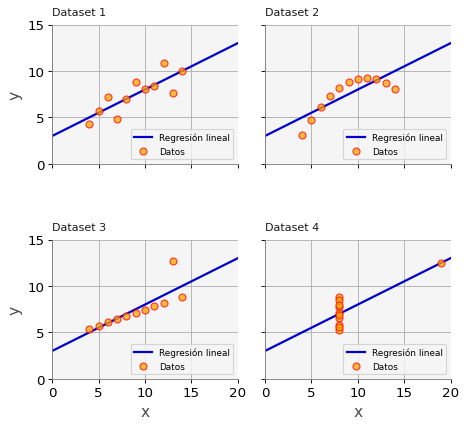

In [27]:
x = np.linspace(0,20,50)

y1 = 𝛽𝟶_1 + 𝛽𝟷_1 * x
y2 = 𝛽𝟶_2 + 𝛽𝟷_2 * x
y3 = 𝛽𝟶_3 + 𝛽𝟷_3 * x
y4 = 𝛽𝟶_4 + 𝛽𝟷_4 * x

y = [y1, y2, y3, y4]
columnas = list(datos.columns)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,6), sharey='row', sharex='col')
ax = axes.flatten()

for i, (xd, yd) in enumerate(zip(columnas[::2], columnas[1::2])):
    ax[i].plot(x, y[i], c = "mediumblue", lw=2, label = "Regresión lineal")
    ax[i].scatter(datos[xd], datos[yd], marker = 'o', s=40, 
                  fc='orange', ec='red', alpha = 0.75,  zorder=5, label="Datos")
    ax[i].set_xlim(0,20)
    ax[i].set_ylim(0,15)
    ax[i].set_aspect("equal")
    if i > 1:
        ax[i].set_xlabel("x")
    if not i % 2:
        ax[i].set_ylabel("y")
    ax[i].set_title(f"Dataset {i+1}", fontsize=10)
    ax[i].grid()
    ax[i].legend(loc="lower right", fontsize=8)

plt.tight_layout()
plt.show()

**Observaciones**.

- Gráfica del Dataset 1: relación lineal simple entre dos variables correlacionadas.
- Gráfica del Dataset 2: se observa una relación entre $x$ y $y$ pero no parece ser lineal.
- Gráfica del Dataset 3: relación lineal pero la regresión obtenida se ve afectada por un valor atípico (*outlier*) que influye en el resultado final y altera el coeficiente de correlación de 1 a 0.816.
- Gráfica del Dataset 4: se muestra como un valor atípico es suficiente para producir un coeficiente de correlación alto, aún cuando la relación entre las variables no es lineal.

## Deducción de los coeficientes $\beta_0$ y $\beta_1$.

El modelo de regresión lineal se escribe como 
$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i \;\; \text{para} \;\; i=1,\dots, n.
$$
Queremos elegir $\beta_0,\beta_1$ que minimicen la suma de los errores al cuadrado (SSE) es decir

$$
S(\beta_0,\beta_1)=\sum_{i=1}^n \big(y_i - \beta_0 - \beta_1 x_i\big)^2.
$$

### Paso 1 — derivadas parciales (ecuaciones normales).
Minimizar $S$ implica anular sus derivadas parciales:

$$
\frac{\partial S}{\partial \beta_0} = -2\sum_{i=1}^n \big(y_i - \beta_0 - \beta_1 x_i\big)=0
$$

$$
\frac{\partial S}{\partial \beta_1} = -2\sum_{i=1}^n x_i\big(y_i - \beta_0 - \beta_1 x_i\big)=0
$$

Quitando el factor $-2$ y reescribiendo obtenemos las **ecuaciones normales**:

$$
\sum_{i=1}^n y_i = n\beta_0 + \beta_1\sum_{i=1}^n x_i \tag{1}
$$

$$
\sum_{i=1}^n x_i y_i = \beta_0\sum_{i=1}^n x_i + \beta_1\sum_{i=1}^n x_i^2 \tag{2}
$$

### Paso 2 — resolver para $\beta_0$ y $\beta_1$.
Recordando que las medias se escriben como
$$\bar x = \dfrac{1}{n}\sum_{i=1}^n x_i \;\; \text{y} \;\; \bar y = \dfrac{1}{n}\sum_{i=1}^n y_i$$

Podemos despejar $\beta_0$ de $(1)$ para obtener

$$
\beta_0 = \bar y - \beta_1 \bar x.
$$

Sustituimos en $(2)$:

$$
\sum_{i=1}^n x_i y_i = (\bar y - \beta_1 \bar x)\sum_{i=1}^n x_i + \beta_1\sum_{i=1}^n x_i^2.
$$

Como $\displaystyle \sum_{i=1}^n x_i = n\bar x$, simplificamos:

$$
\sum_{i=1}^n x_i y_i = n\bar x\bar y - \beta_1 n\bar x^2 + \beta_1\sum_{i=1}^n x_i^2.
$$

Reordenando:

$$
\beta_1\Big(\sum_{i=1}^n x_i^2 - n\bar x^2\Big) = \sum_{i=1}^n x_i y_i - n\bar x\bar y.
$$

Observa que:

$$\sum_{i=1}^n x_i^2 - n\bar x^2 = \sum_{i=1}^n (x_i-\bar x)^2$$ 

y 

$$\sum_{i=1}^n x_i y_i - n\bar x\bar y = \sum_{i=1}^n (x_i-\bar x)(y_i-\bar y)$$

Por lo tanto

$$
\displaystyle \beta_1 = \dfrac{\sum_{i=1}^n (x_i-\bar x)(y_i-\bar y)}{\sum_{i=1}^n (x_i-\bar x)^2}
\quad\text{y}\quad
\boxed{\displaystyle \beta_0 = \bar y - \beta_1\bar x.}
$$